<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/Deep_Learning_Projects/blob/main/Heart_Disease_ANN/Heart_Disease_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import Dataset

In [26]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DL/Deep_Learning_Youtube/heart.csv")
df.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0


# Check Dataset

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


| #   | Column          | Description                                                                            | Data Type |
|-----|-----------------|----------------------------------------------------------------------------------------|-----------|
| 0   | Age             | The age of the individual in years.                                                     | int64     |
| 1   | Sex             | The gender of the individual (e.g., 'Male', 'Female').                                  | object    |
| 2   | ChestPainType   | The type of chest pain experienced (e.g., 'Typical', 'Atypical', 'Non-anginal', 'Asymptomatic'). | object    |
| 3   | RestingBP       | Resting blood pressure (measured in mm Hg on admission to the hospital).                | int64     |
| 4   | Cholesterol     | Serum cholesterol level in mg/dl.                                                       | int64     |
| 5   | FastingBS       | Fasting blood sugar level (1 if > 120 mg/dl, 0 otherwise).                              | int64     |
| 6   | RestingECG      | Results of resting electrocardiogram (e.g., 'Normal', 'ST-T abnormality', 'LVH').       | object    |
| 7   | MaxHR           | Maximum heart rate achieved during exercise.                                            | int64     |
| 8   | ExerciseAngina  | Exercise-induced angina (chest pain) (Yes or No).                                       | object    |
| 9   | Oldpeak         | ST depression induced by exercise relative to rest, a measure of heart stress (float).  | float64   |
| 10  | ST_Slope        | Slope of the peak exercise ST segment ('Up', 'Flat', 'Down').                           | object    |
| 11  | HeartDisease    | Target variable indicating presence of heart disease (1 = Yes, 0 = No).                 | int64     |


## Check Categorical Data

In [28]:
df['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


In [29]:
df['RestingECG'].value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


## Check Statistical Summary

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


# Preparing For Modelling

## Splitting Features & Target

In [31]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

print(f"X Shape: {X.shape}")
print(f"y Shape: {y.shape}")

X Shape: (918, 11)
y Shape: (918,)


## Encoding Categorical Features

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
X_encoded = X.apply(LabelEncoder().fit_transform)
X_encoded.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2


## Splitting Train/Test

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [36]:
print(f"X_train Shape: {X_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (734, 11)
X_test Shape: (184, 11)
y_train Shape: (734,)
y_test Shape: (184,)


## Scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
X_train[0]

array([0.27083333, 1.        , 0.66666667, 0.33333333, 0.44343891,
       1.        , 0.5       , 0.98305085, 0.        , 0.34615385,
       0.        ])

In [40]:
X_test[0]

array([0.70833333, 0.        , 0.33333333, 0.62121212, 0.239819  ,
       0.        , 0.5       , 0.88983051, 0.        , 0.19230769,
       1.        ])

# Model Definition

## Import Libraries

In [41]:
import tensorflow as tf
from tensorflow import keras

## Building NN

In [111]:
# Creating Sequential
model = keras.Sequential()

# Add layers
# Input Layers
model.add(keras.layers.Input(shape=(11,)))

# Dense Layer #1
model.add(keras.layers.Dense(units=64,
                             activation='relu'))
# Dropout Layer
model.add(keras.layers.Dropout(rate=0.2))


# Dense Layer #2
model.add(keras.layers.Dense(units=128,
                             activation='relu'))
# Dropout Layer
model.add(keras.layers.Dropout(rate=0.3))


# Dense Layer #3
model.add(keras.layers.Dense(units=256,
                             activation='relu'))
# Dropout Layer
model.add(keras.layers.Dropout(rate=0.3))


# Dense Layer #4
model.add(keras.layers.Dense(units=512,
                             activation='relu'))
# Dropout Layer
model.add(keras.layers.Dropout(rate=0.2))


# Output Layer
model.add(keras.layers.Dense(units=1,
                             activation='sigmoid'))

In [112]:
# Compiling
model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.0001),
              loss = tf.losses.binary_crossentropy,
              metrics = ['accuracy']
              )

In [113]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                     │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 174,209 (680.50 KB)

 Trainable params: 174,209 (680.50 KB)

 Non-trainable params: 0 (0.00 B)

1. **Dense Layers**:
   - There are five fully connected (dense) layers in the model.
   - Dense layer has 64, 128, 256, 512 units, except the final dense layer, which has 1 unit.
   - The first dense layer takes an input and transforms it into 128 features.
   - The last dense layer outputs a single value, which is typical for regression tasks.

2. **Dropout Layers**:
   - Dropout layers follow each dense layer, except the last one, with a dropout rate to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training.

3. **Total Parameters**:
   - The model has a total of 51,201 trainable parameters.
   - These parameters are distributed across the dense layers, with no non-trainable parameters, meaning all parameters are updated during training.

In [114]:
# Early Stopping
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

In [115]:
# Fitting
hist = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    callbacks=early_stop,
    validation_data=(X_test, y_test))

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5774 - loss: 0.6856 - val_accuracy: 0.6087 - val_loss: 0.6584
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6280 - loss: 0.6527 - val_accuracy: 0.6685 - val_loss: 0.6311
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6614 - loss: 0.6381 - val_accuracy: 0.7989 - val_loss: 0.5996
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6958 - loss: 0.6231 - val_accuracy: 0.8043 - val_loss: 0.5632
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7774 - loss: 0.5657 - val_accuracy: 0.7989 - val_loss: 0.5213
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8161 - loss: 0.5095 - val_accuracy: 0.7826 - val_loss: 0.4873
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7830 - loss: 0.5260 - val_accuracy: 0.7989 - val_loss: 0.4634
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8074 - loss: 0.4563 - val_accuracy: 0.7989 - 

## Check Training Plot

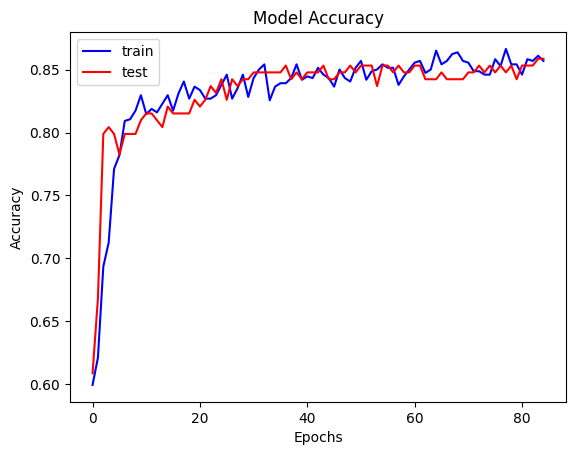

In [116]:
plt.plot(hist.history['accuracy'], color='blue')
plt.plot(hist.history['val_accuracy'], color='red')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])

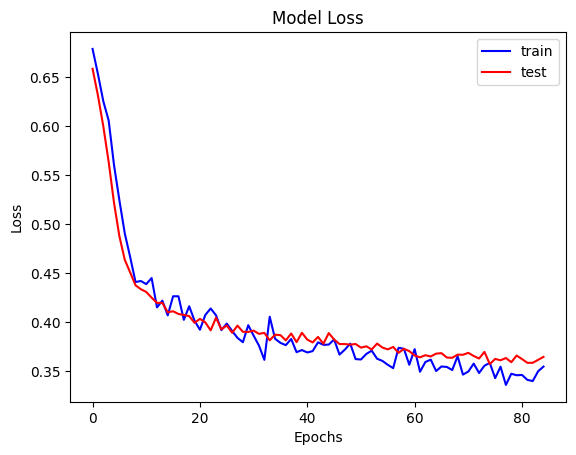

In [117]:
plt.plot(hist.history['loss'], color='blue')
plt.plot(hist.history['val_loss'], color='red')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])